<a href="https://colab.research.google.com/github/haxamanesh/PCA-and-Clustering-Online-shop-shoppers/blob/main/Glass_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler




In [6]:
# data =pd.read_table("glass_data.txt", names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], sep = ",")

In [4]:
df = pd.read_csv("glass_data.csv")

In [19]:
df.head()
df.drop(["id number"], inplace = True, axis = 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ri             214 non-null    float64
 1   na             214 non-null    float64
 2   mg             214 non-null    float64
 3   ai             214 non-null    float64
 4   si             214 non-null    float64
 5   k              214 non-null    float64
 6   ca             214 non-null    float64
 7   ba             214 non-null    float64
 8   fe             214 non-null    float64
 9   type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


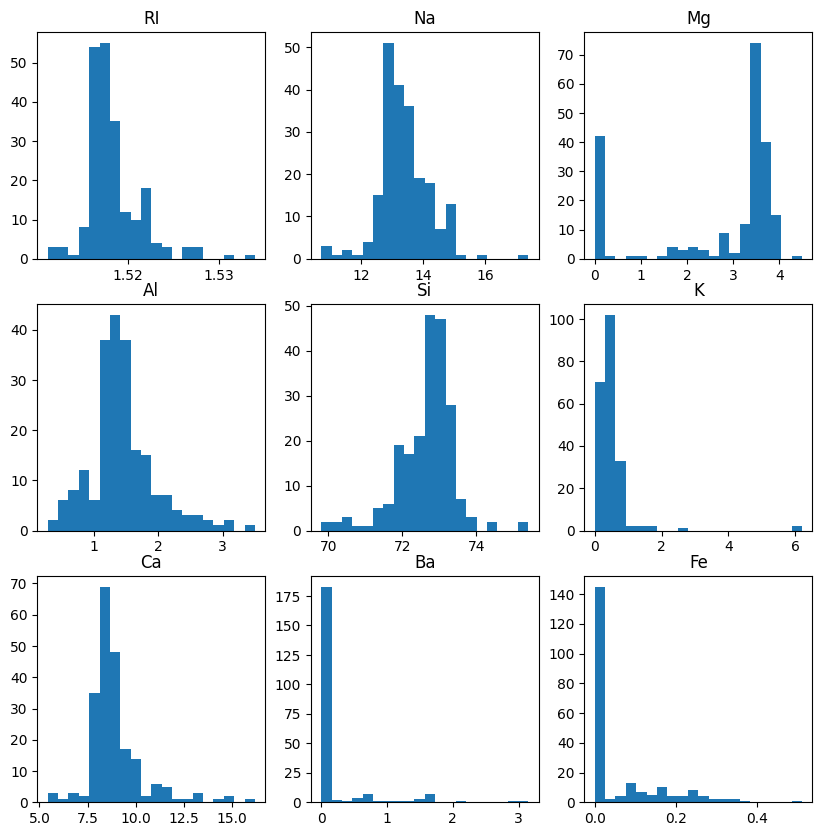

In [ ]:
from matplotlib import pyplot as plt
# plt.figure(figsize = (20,10))
fig, ax = plt.subplots(3,3, figsize = (10,10))
ax[0,0].hist(df['RI'], bins=20,label = "RI" )
ax[0,1].hist(df['Na'], bins=20, label = "Na")
ax[0,2].hist(df['Mg'], bins=20, label = "Mg")
ax[1,0].hist(df['Al'], bins=20, label = "Al")
ax[1,1].hist(df['Si'], bins=20, label = "Si")
ax[1,2].hist(df['K'], bins=20, label = "K")
ax[2,0].hist(df['Ca'], bins=20, label = "Ca")
ax[2,1].hist(df['Ba'], bins=20, label = "Ba")
ax[2,2].hist(df['Fe'], bins=20, label = "Fe")
ax[0,0].set_title("RI")
ax[0,1].set_title("Na")
ax[0,2].set_title("Mg")
ax[1,0].set_title("Al")
ax[1,1].set_title("Si")
ax[1,2].set_title("K")
ax[2,0].set_title("Ca")
ax[2,1].set_title("Ba")
ax[2,2].set_title("Fe")
plt.show()


In [21]:
df.describe()

,ri,na,mg,ai,si,k,ca,ba,fe,type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [22]:
df["type of glass"].value_counts()

type of glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [23]:
df.isnull().sum().sum()

0

In [24]:
df.duplicated().sum()

1

In [34]:
X = df.iloc[:,:-1]; X.info()
y = df["type of glass"].values
X_train ,X_test,y_train, y_test =train_test_split(X,y,test_size=0.2, random_state= 1)
print(np.unique(y_train))
print(np.unique(y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ri      214 non-null    float64
 1   na      214 non-null    float64
 2   mg      214 non-null    float64
 3   ai      214 non-null    float64
 4   si      214 non-null    float64
 5   k       214 non-null    float64
 6   ca      214 non-null    float64
 7   ba      214 non-null    float64
 8   fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB
[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [58]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)


# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1, criterion= "entropy")
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [59]:
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.279070
1,Gradient Boost,0.813953
2,Decision Tree,0.744186
3,Random Forest,0.744186


# Standardized the response variables

In [60]:
sc = StandardScaler()
Xs_train = sc.fit_transform(X_train)
Xs_test = sc.transform(X_test)

In [62]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(Xs_train,y_train)
ys_pred = svmMod.predict(Xs_test)
sc1 = metrics.accuracy_score(ys_pred,y_test)

# XGBoost CLassifier
# xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
# xgbMod.fit(X_train,y_train)
# y_pred = xgbMod.predict(X_test)
# sc2 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(Xs_train,y_train)
ys_pred = gbmMod.predict(Xs_test)
sc3 = metrics.accuracy_score(ys_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(Xs_train, y_train)
ys_pred = DecTree.predict(Xs_test)
sc4 = metrics.accuracy_score(ys_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 42,criterion= "entropy")
RandFor.fit(Xs_train, y_train)
ys_pred = RandFor.predict(Xs_test)
sc5 = metrics.accuracy_score(ys_pred,y_test)

In [63]:
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.697674
1,Gradient Boost,0.813953
2,Decision Tree,0.744186
3,Random Forest,0.790698


In [ ]:
# Multi-Layer Perceptron (Neural Network)
mlpMod = MLPClassifier(hidden_layer_sizes=(150, ), max_iter=1500, random_state=42, activation='relu')
mlpMod.fit(Xs_train, y_train)
ysn_pred = mlpMod.predict(Xs_test)
sc6 = metrics.accuracy_score(ysn_pred, y_test)

In [ ]:
input_shape = [Xs_train.shape[1]]; input_shape
Xs_train.shape

(171, 9)

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=9,input_shape = input_shape,  activation = "relu"),
tf.keras.layers.Dense(1, activation = "relu")
                              ])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
 dense_10 (Dense)            (None, 1)                 10        
                                                                 
Total params: 100 (400.00 Byte)
Trainable params: 100 (400.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',

              # MAE error is good for
              # numerical predictions
              loss='mae')

In [ ]:
losses = model.fit(Xs_train, y_train,

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=10, epochs = 17, shuffle = False )
                    #total epoch )

Epoch 1/17
18/18 [==============================] - 1s 2ms/step - loss: 2.8783
Epoch 2/17
18/18 [==============================] - 0s 2ms/step - loss: 2.8615
Epoch 3/17
18/18 [==============================] - 0s 2ms/step - loss: 2.8238
Epoch 4/17
18/18 [==============================] - 0s 2ms/step - loss: 2.7573
Epoch 5/17
18/18 [==============================] - 0s 2ms/step - loss: 2.6759
Epoch 6/17
18/18 [==============================] - 0s 2ms/step - loss: 2.5866
Epoch 7/17
18/18 [==============================] - 0s 2ms/step - loss: 2.4866
Epoch 8/17
18/18 [==============================] - 0s 2ms/step - loss: 2.3765
Epoch 9/17
18/18 [==============================] - 0s 2ms/step - loss: 2.2578
Epoch 10/17
18/18 [==============================] - 0s 2ms/step - loss: 2.1377
Epoch 11/17
18/18 [==============================] - 0s 2ms/step - loss: 2.0493
Epoch 12/17
18/18 [==============================] - 0s 2ms/step - loss: 2.0067
Epoch 13/17
18/18 [==============================

In [ ]:
yss_predict = model.predict(Xs_test)
yss_predict.shape
results = model.evaluate(Xs_test, y_test, verbose = 0); results

2/2 [==============================] - 0s 6ms/step


1.4193843603134155

In [ ]:
m = tf.keras.metrics.Accuracy()
m.update_state([1],[2],[3])
m.result().numpy()

0.0

In [ ]:
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5],
                                    ["Neural Network",sc6]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.697674
1,Gradient Boost,0.813953
2,Decision Tree,0.720930
3,Random Forest,0.744186
4,Neural Network,0.767442


In [ ]:
link to my github